**Brian Blaylock**  

# Fig. XX: Verification Domains

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')
from BB_HRRR.HRRR_Pando import get_hrrr_variable
from BB_HRRR.HRRR_paths import get_domains
from BB_maps.my_basemap import draw_HRRR_map

import matplotlib as mpl 
two_column = 5.5
one_column = 3.2
twothird_column = 6.8
mpl.rcParams['figure.figsize'] = [twothird_column, twothird_column]
mpl.rcParams['figure.titlesize'] = 12
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.03
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 7
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
    
mpl.rcParams['savefig.dpi'] = 600    # 600 for print

In [2]:
m = draw_HRRR_map(resolution='f')

loaded /uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_maps/saved_map_objects/HRRR_lcc_f_2000.npy map from file


In [3]:
H = get_hrrr_variable(datetime(2019,1,1), 'HGT:surface', verbose=False)
H_land = get_hrrr_variable(datetime(2019,1,1), 'LAND:surface', verbose=False)

In [4]:
# Set water points as a low value for terrain colormap to display correctly.
H['value'][H_land['value']==0] = -4500

In [6]:
domains = get_domains()

HRRR Area in meters squared: 16811840278558.668
West Area in meters squared: 4034896806752.7593
Central Area in meters squared: 4034896806752.766
East Area in meters squared: 4034896806752.762


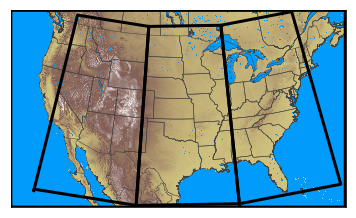

In [9]:
c = [.25,.25,.25]

for i, d in domains.items():
    x = d['path'].vertices[:,0]
    y = d['path'].vertices[:,1]
    X, Y = m(x,y)
    m.plot(X,Y, linewidth=3, color='k', linestyle='-')

m.drawcoastlines(linewidth=.5, color=c)
m.drawstates(linewidth=.5, color=c)
m.drawcountries(color=c)
m.pcolormesh(H['lon'], H['lat'], H['value'], vmin=-6100, vmax=4183, latlon=True, cmap='terrain');

plt.savefig('./figs/fig_xx_verification-domains')

In [10]:
for i, k in domains.items():
    print('%s area is %.3f km2' % (i, k['area']/1e6))

HRRR area is 16811840.279 km2
West area is 4034896.807 km2
Central area is 4034896.807 km2
East area is 4034896.807 km2
